<a href="https://colab.research.google.com/github/Derrick-Majani/Py-Caret-Linear-Regression/blob/main/SuperKartBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SuperKart Price Prediction
** Objective:
SuperKartKart is an organization which owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

** Data Description:
The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number
- Product_Weight - weight of each product
- Product_Sugar_Content - sugar content of each product like low sugar, regular and no sugar
- Product_Allocated_Area - ratio of the allocated display area of each product to the total display area of all the products in a store
- Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, breads, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- Product_MRP - maximum retail price of each product
- Store_Id - unique identifier of each store
- Store_Establishment_Year - year in which the store was established
- Store_Size - size of the store depending on sq. feet like high, medium and low
- Store_Location_City_Type - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
Store_Type - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import io
import os
import sys
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving SuperKart.csv to SuperKart.csv


In [ ]:
kart=pd.read_csv(io.BytesIO(uploaded['SuperKart.csv']))
kart.sample(n=5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
547,FD2505,9.82,Low Sugar,0.045,Baking Goods,128.34,OUT001,1987,High,Tier 2,Supermarket Type1,2431.05
5559,FD4211,9.79,Low Sugar,0.062,Dairy,105.19,OUT002,1998,Small,Tier 3,Food Mart,1949.20
4588,FD5647,10.86,Regular,0.033,Breads,138.43,OUT004,2009,Medium,Tier 2,Supermarket Type2,2872.01
3411,FD7869,14.67,Low Sugar,0.058,Dairy,166.79,OUT003,1999,Medium,Tier 1,Departmental Store,4312.56
4290,FD4031,8.46,Low Sugar,0.104,Breads,112.16,OUT002,1998,Small,Tier 3,Food Mart,1792.21


In [ ]:
# copying data to another variable to avoid any changes to original data
data = kart.copy()

In [ ]:
data.shape

(8763, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

## Statistical Analysis

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


In [ ]:
# Print categorical summary
print('Categorical Summary:')
data.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
Product_Id,8763,8763,FD6114,1
Product_Sugar_Content,8763,4,Low Sugar,4885
Product_Type,8763,16,Fruits and Vegetables,1249
Store_Id,8763,4,OUT004,4676
Store_Size,8763,3,Medium,6025
Store_Location_City_Type,8763,3,Tier 2,6262
Store_Type,8763,4,Supermarket Type2,4676


In [ ]:
data.duplicated().any()

False

In [ ]:
data.nunique()

Product_Id                   8763
Product_Weight               1113
Product_Sugar_Content           4
Product_Allocated_Area        228
Product_Type                   16
Product_MRP                  6100
Store_Id                        4
Store_Establishment_Year        4
Store_Size                      3
Store_Location_City_Type        3
Store_Type                      4
Product_Store_Sales_Total    8668
dtype: int64

## Chi Square

In [ ]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['Product_Sugar_Content', 'Store_Size', 'Store_Location_City_Type', 'Store_Type','Product_Type','Store_Id']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
results_df

,Column 1,Column 2,Chi-Square,P-Value
0,Product_Sugar_Content,Store_Size,8.707029,0.190737
1,Product_Sugar_Content,Store_Location_City_Type,4.595647,0.596616
2,Product_Sugar_Content,Store_Type,9.611451,0.382846
3,Product_Sugar_Content,Product_Type,8863.359524,0.000000
4,Product_Sugar_Content,Store_Id,9.611451,0.382846
5,Store_Size,Store_Location_City_Type,9259.932991,0.000000
6,Store_Size,Store_Type,17526.000000,0.000000
7,Store_Size,Product_Type,28.792000,0.528542
8,Store_Size,Store_Id,17526.000000,0.000000
9,Store_Location_City_Type,Store_Type,17526.000000,0.000000


## Correlation Analysis

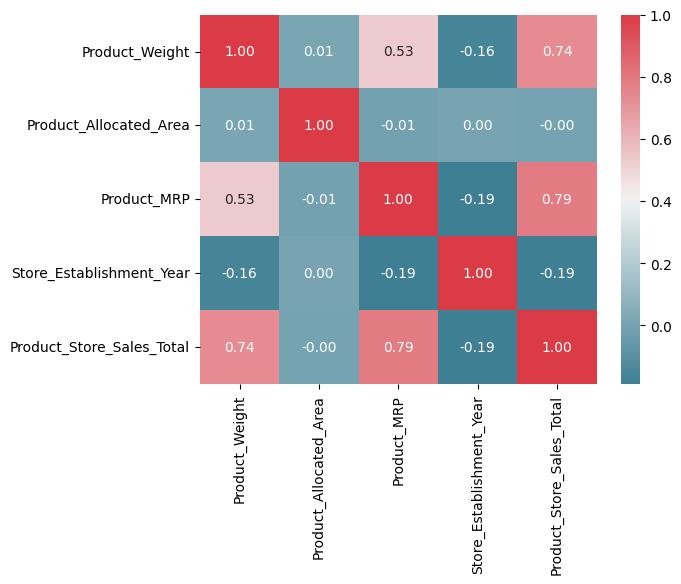

In [ ]:
# Select only numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Define a custom color palette
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt='.2f')

# Show the plot
plt.show()


## Feature Engineering

In [ ]:
# Assuming your dataframe is named 'data'
data.drop("Product_Id", axis=1, inplace=True)

# Print the updated dataframe
data


,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36
...,...,...,...,...,...,...,...,...,...,...,...
8758,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82


In [ ]:
import pandas as pd

# Select only categorical columns
cat_cols = data.select_dtypes(include=['object'])

# Get value counts for each categorical column
for col in cat_cols:
    print(f"Value Counts for {col}:")
    print(data[col].value_counts())
    print()


Value Counts for Product_Sugar_Content:
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64

Value Counts for Product_Type:
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64

Value Counts for Store_Id:
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64

Value Counts for Store_Size:
Medium    6025
High      1586
Small     1152
Name: Store_Size, dtype: int64

Value Counts for Store_Location_City_Type:
Tier 2    6262
Tier 1    1349
Tier

In [ ]:
# Assuming your dataframe is named 'data'
data['Product_Sugar_Content'] = data['Product_Sugar_Content'].replace('reg', 'Regular')

# Print the updated value counts
print(data['Product_Sugar_Content'].value_counts())

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64


In [ ]:
# Define the perishable and non-perishable categories
perishables = ['Fruits and Vegetables', 'Dairy', 'Meat', 'Seafood']
non_perishables = ['Snack Foods', 'Frozen Foods', 'Household', 'Baking Goods', 'Canned',
                   'Health and Hygiene', 'Soft Drinks', 'Breads', 'Hard Drinks', 'Others',
                   'Starchy Foods', 'Breakfast']

# Create a new column 'Product_Category' based on the binning
data['Product_Category'] = data['Product_Type'].apply(lambda x: 'Perishables' if x in perishables else 'Non-Perishables')

# Print the value counts of the new 'Product_Category' column
print(data['Product_Category'].value_counts())


Non-Perishables    6024
Perishables        2739
Name: Product_Category, dtype: int64


In [ ]:
# Assuming your dataframe is named 'data'
data.drop(["Product_Type", "Store_Establishment_Year", "Store_Id"], axis=1, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_MRP                8763 non-null   float64
 4   Store_Size                 8763 non-null   object 
 5   Store_Location_City_Type   8763 non-null   object 
 6   Store_Type                 8763 non-null   object 
 7   Product_Store_Sales_Total  8763 non-null   float64
 8   Product_Category           8763 non-null   object 
dtypes: float64(4), object(5)
memory usage: 616.3+ KB


### Download a Copy of CLeaned Data to CSV

In [ ]:
from google.colab import files
data.to_csv('SuperKart_cleaned.csv') 
files.download('SuperKart_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Preparation for modelling

In [ ]:
# Separating features and the target column
X = data.drop("Product_Store_Sales_Total", axis=1)  # Drop the specified column
y = data["Product_Store_Sales_Total"]


## One Hot Encoding

In [ ]:
# Select the categorical columns to one-hot encode
cat_cols = ['Product_Sugar_Content', 'Store_Size', 'Store_Location_City_Type', 'Store_Type', 'Product_Category']

# Perform one-hot encoding
X = pd.get_dummies(data, columns=cat_cols)

# Print the encoded DataFrame
X

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Product_Sugar_Content_Low Sugar,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_High,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 1,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Departmental Store,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Category_Non-Perishables,Product_Category_Perishables
0,12.66,0.027,117.08,2842.40,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
1,16.54,0.144,171.43,4830.02,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,14.28,0.031,162.08,4130.16,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,12.10,0.112,186.31,4132.18,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,9.57,0.010,123.67,2279.36,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,14.80,0.016,140.53,3806.53,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
8759,14.06,0.142,144.51,5020.74,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
8760,13.48,0.017,88.58,2443.42,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
8761,13.89,0.193,168.44,4171.82,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6134, 19)
Testing set shape: (2629, 19)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
random_forest = RandomForestRegressor()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 5.300452150585417
Testing RMSE: 2.858287094345901
Training MAE: 0.3651350505379152
Testing MAE: 0.7997715861544129
Training R^2 Score: 0.9999752525639349
Testing R^2 Score: 0.999992805717931


- Training RMSE: 4.440120141009401 The root mean squared error (RMSE) measures the average difference between the actual and predicted values.
In this case, the training RMSE of 4.44 suggests that, on average, the predictions of the model are off by approximately 4.44 units of the target variable.
Testing RMSE: 2.995424922767731

- The testing RMSE of 2.99 indicates the average difference between the actual and predicted values on the unseen test data.
Comparing it to the training RMSE, a lower value suggests that the model generalizes well to new, unseen data.
Training MAE: 0.3558180143462358

- The mean absolute error (MAE) measures the average absolute difference between the actual and predicted values.
In this case, the training MAE of 0.36 suggests that, on average, the predictions of the model deviate by approximately 0.36 units from the actual values.
Testing MAE: 0.7858620387979963

- The testing MAE of 0.79 represents the average absolute difference between the actual and predicted values on the test data.
Comparing it to the training MAE, a higher value suggests that the model's predictions have a slightly higher deviation on the test data.
Training R^2 Score: 0.9999826342390986

- The R^2 score, also known as the coefficient of determination, measures the proportion of variance explained by the model.
A score of 0.99998 indicates that the model can explain approximately 99.998% of the variance in the training data. This suggests a very high level of fit to the training data.
Testing R^2 Score: 0.9999920988075075

- The testing R^2 score of 0.99999 indicates the proportion of variance explained by the model on the test data.
A high value close to 1 suggests that the model generalizes well to new, unseen data and can explain approximately 99.999% of the variance

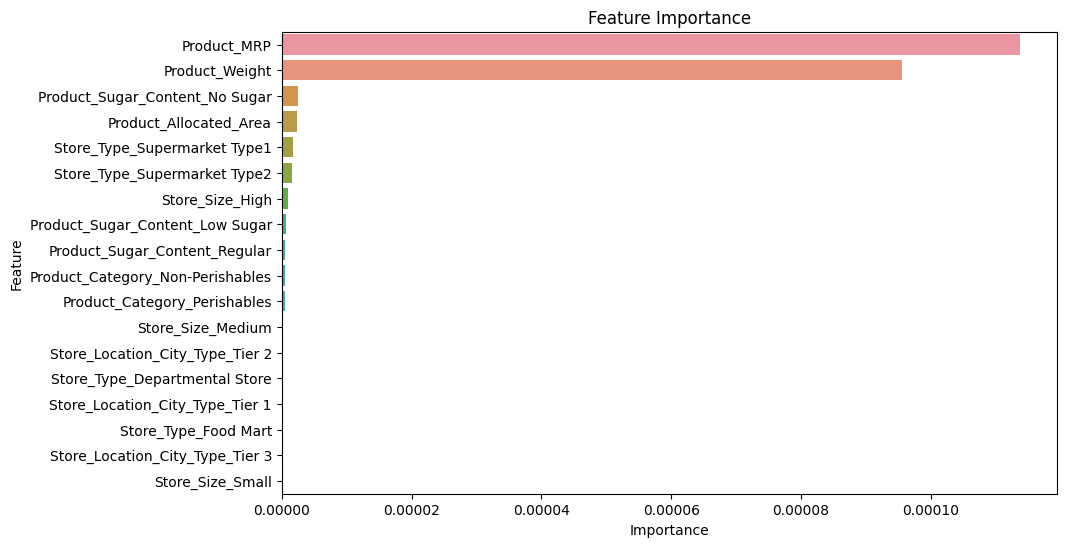

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
random_forest.fit(X_train, y_train)

# Get the feature importances
importances = random_forest.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Hyper-Parameter Tuning Using Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest regressor
rf = RandomForestRegressor()

# Define the hyperparameters to tune
parameters = {
    "max_depth": [4, 6, 8, 10, None],
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [80, 90, 100, 110, 120],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, parameters, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 10, 'max_features': None, 'n_estimators': 110}
Best Score: 0.9998110037262741


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
rft = RandomForestRegressor(max_depth=10, max_features=None, n_estimators=100)

# Train the model
rft.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = rft.predict(X_train)
y_test_pred = rft.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 4.700391242290497
Testing RMSE: 2.9163894260769965
Training MAE: 0.6134466482401577
Testing MAE: 0.9500697193961959
Training R^2 Score: 0.999980538675635
Testing R^2 Score: 0.9999925102590916


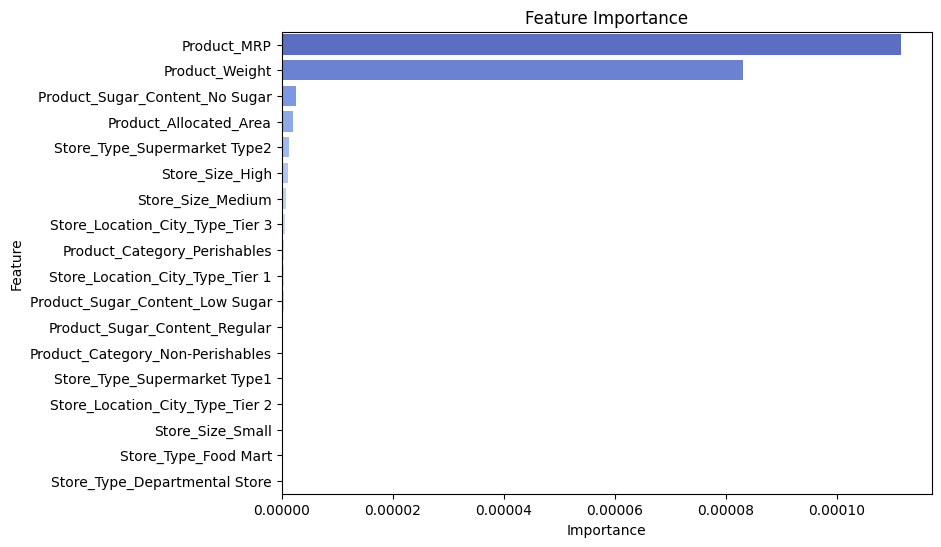

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
rft.fit(X_train, y_train)

# Get the feature importances
importances = rft.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Set the colors
colors = sns.color_palette("coolwarm", n_colors=len(feature_importances))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette=colors)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

# Adjust the visibility of the bar plots
plt.subplots_adjust(left=0.25)

plt.show()


## Boosting Techniques

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the base regressor
adaboost = AdaBoostRegressor(random_state=1)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_preds = adaboost.predict(X_train)
test_preds = adaboost.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 91.70432481276255
Testing RMSE: 91.86827070964955
Training MAE: 73.92145338188065
Testing MAE: 73.89775390413598
Training R^2 Score: 0.9925922893594138
Testing R^2 Score: 0.992567980379678


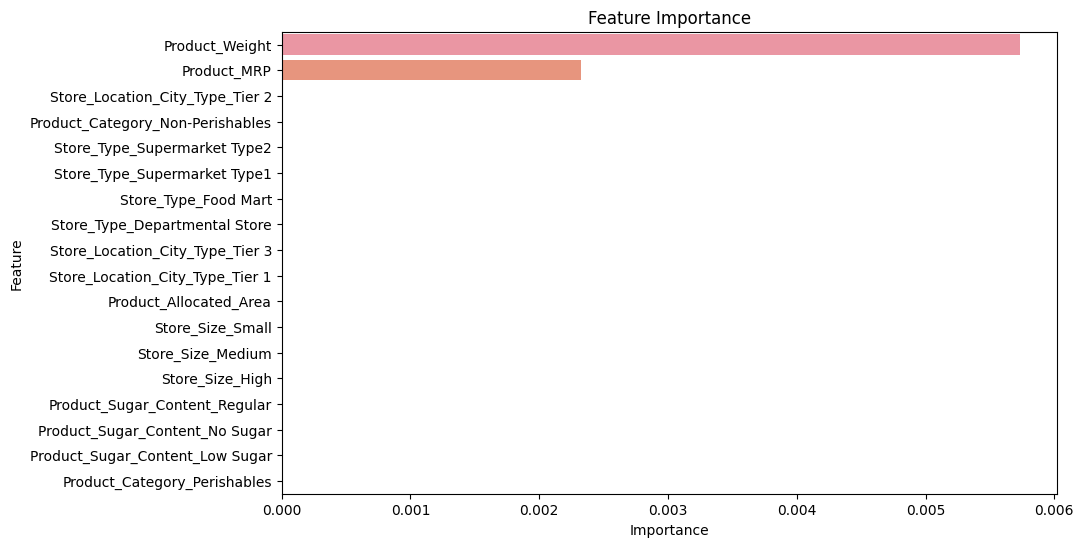

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
adaboost.fit(X_train, y_train)

# Get the feature importances
importances = adaboost.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Hyperparameter Tuning -Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest regressor
ab_tuned = AdaBoostRegressor()

# Define the hyperparameters to tune
# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Perform grid search with cross-validation
grid_search = GridSearchCV(ab_tuned, parameters, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 1, 'n_estimators': 90}
Best Score: 0.9946189548379742


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
abt = AdaBoostRegressor(learning_rate=1,n_estimators=100)

# Train the model
abt.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred =abt.predict(X_train)
y_test_pred = abt.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 78.296768157988
Testing RMSE: 79.3519550772788
Training MAE: 62.0742088776135
Testing MAE: 62.65824859057262
Training R^2 Score: 0.9946000213023644
Testing R^2 Score: 0.9944551343560262


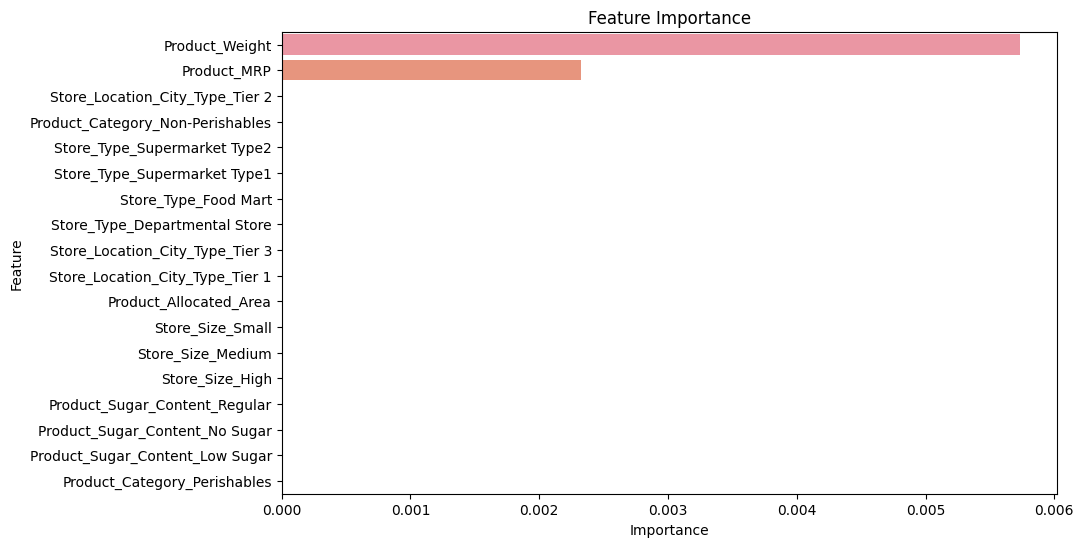

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
abt.fit(X_train, y_train)

# Get the feature importances
importances = adaboost.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Gradient Boost CLassifier

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Gradient Boosting regressor
gradient_boosting = GradientBoostingRegressor(random_state=1)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_preds = gradient_boosting.predict(X_train)
test_preds = gradient_boosting.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 10.480000839806992
Testing RMSE: 11.581709320488375
Training MAE: 7.8678056475998375
Testing MAE: 8.634231548129257
Training R^2 Score: 0.999903255338541
Testing R^2 Score: 0.9998818806397626


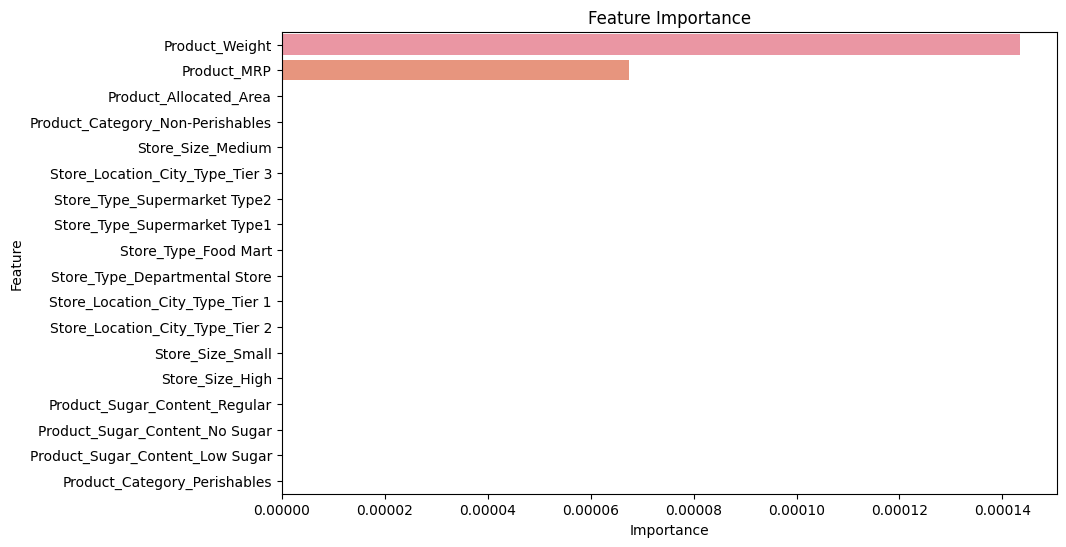

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
gradient_boosting.fit(X_train, y_train)

# Get the feature importances
importances = gradient_boosting.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Hyperparameter Tuning - GBC

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest regressor
gbc_tuned = GradientBoostingRegressor()

# Define the hyperparameters to tune
# Grid of parameters to choose from
# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbc_tuned, parameters, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 10, 'max_features': 0.9, 'n_estimators': 150, 'subsample': 0.8}
Best Score: 0.9998284520949454


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
gbct = GradientBoostingRegressor(max_depth=10,max_features=0.9, n_estimators=150,subsample=0.7)

# Train the model
gbct.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred =gbct.predict(X_train)
y_test_pred = gbct.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 0.0566979944551708
Testing RMSE: 4.3543493222745075
Training MAE: 0.04483642614891654
Testing MAE: 1.158515806117726
Training R^2 Score: 0.9999999971683488
Testing R^2 Score: 0.9999833036208541


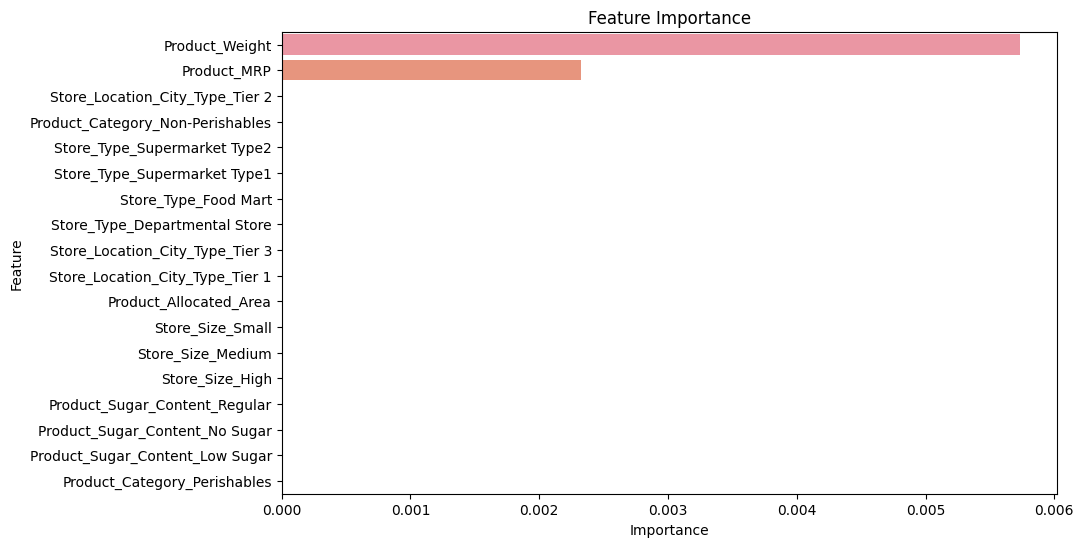

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
gbct.fit(X_train, y_train)

# Get the feature importances
importances = adaboost.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Print the evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 3.2384701475817916
Testing RMSE: 8.656134054251508
Training MAE: 2.4518315385458362
Testing MAE: 3.70306309702551
Training R^2 Score: 0.9999907618678509
Testing R^2 Score: 0.9999340182679622


## Hyper-Parameter Tuning- XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest regressor
xgb_tuned = XGBRegressor(random_state=1)

# Define the hyperparameters to tune
# Grid of parameters to choose from
parameters = {
    "n_estimators": [75, 100, 125, 150],
    "subsample": [0.7, 0.8, 0.9, 1],
    "gamma": [0, 1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_tuned, parameters, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 5, 'n_estimators': 150, 'subsample': 1}
Best Score: 0.9998083644473944


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Random Forest model
xgb_tuned = XGBRegressor(colsample_bylevel=1,colsample_bytree= 1, n_estimators=150,subsample=1, gamma=5)

# Train the model
xgb_tuned.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred =xgb_tuned.predict(X_train)
y_test_pred = xgb_tuned.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 1.8810288813622715
Testing RMSE: 8.23973347871775
Training MAE: 1.4009606839065847
Testing MAE: 2.8268926064022186
Training R^2 Score: 0.9999968832978409
Testing R^2 Score: 0.9999402136427148


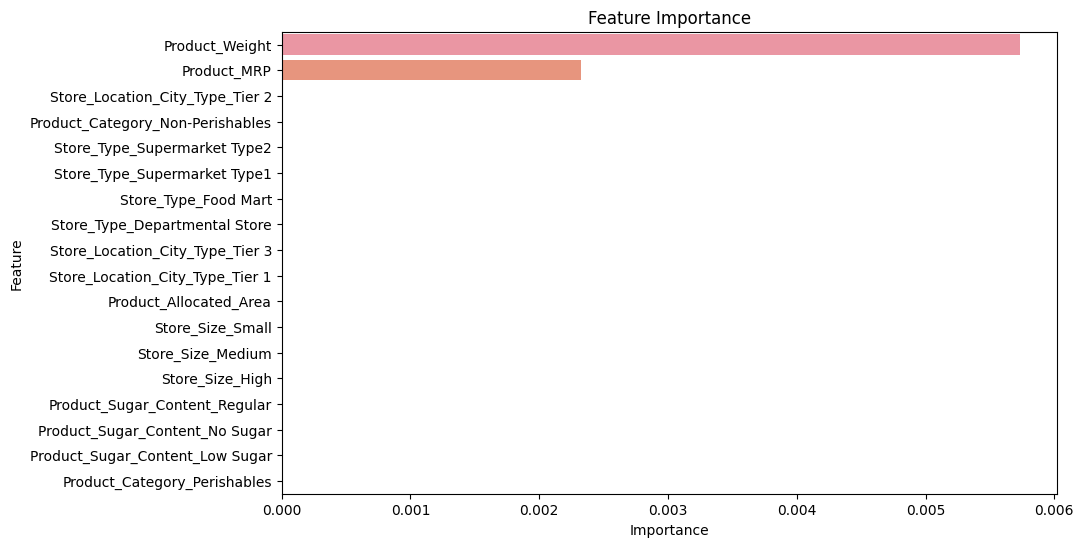

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model (replace this with your own model training code)
xgb_tuned.fit(X_train, y_train)

# Get the feature importances
importances = adaboost.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Exclude the target variable from the feature importances
feature_importances = feature_importances[feature_importances['Feature'] != 'Product_Store_Sales_Total']

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


## Stacking

- Stacking, also known as stacked generalization, is an ensemble learning technique in machine learning. It involves combining multiple base models to create a meta-model that makes predictions based on the outputs of the base models.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('Random_Forest', rft),
    ('AdaBoost', abt),
    ('GradientBoosting', gbct),
    ('XGBoost', xgb_tuned)
]

# Define the stacking regressor with the meta-regressor
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())

# Fit the stacking regressor on the training data
stacking_reg.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = stacking_reg.predict(X_train)

# Make predictions on the test set
test_predictions = stacking_reg.predict(X_test)

# Calculate evaluation metrics for training set
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = stacking_reg.score(X_train, y_train)

# Calculate evaluation metrics for testing set
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = stacking_reg.score(X_test, y_test)

# Print evaluation metrics
print("Stacking Evaluation Metrics (Training Set):")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R^2 Score:", train_r2)
print()
print("Stacking Evaluation Metrics (Testing Set):")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R^2 Score:", test_r2)


Stacking Evaluation Metrics (Training Set):
RMSE: 12.927142778889708
MAE: 2.889950395744639
R^2 Score: 0.9998526410918435

Stacking Evaluation Metrics (Testing Set):
RMSE: 39.44467270764862
MAE: 4.692726145873253
R^2 Score: 0.998636411094158


## COmparison of Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a list of models and their names
models = [random_forest, rft, adaboost, abt, gradient_boosting, gbct, xgb_model, xgb_tuned, stacking_reg]
model_names = ['Random Forest', 'RF_Tuned', 'AdaBoost', 'AdaBoost_Tuned', 'GragientBoost','GB_Tuned', 'XGBoost', 'XGB_Tuned', 'Stacking']

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Model': model_names,
    'Train RMSE': train_rmse,
    'Train MAE': train_mae,
    'Train R^2': train_r2,
    'Test RMSE': test_rmse,
    'Test MAE': test_mae,
    'Test R^2': test_r2
})

# Display the summary dataframe
summary_df

,Model,Train RMSE,Train MAE,Train R^2,Test RMSE,Test MAE,Test R^2
0,Random Forest,4.828038,0.402214,0.999979,3.781129,0.896285,0.999987
1,RF_Tuned,5.172133,0.641939,0.999976,3.526093,1.027635,0.999989
2,AdaBoost,91.783901,73.991187,0.992571,91.632036,73.607056,0.992641
3,AdaBoost_Tuned,84.518302,66.359840,0.993701,85.941814,67.899433,0.993527
4,GragientBoost,10.590819,7.964477,0.999901,11.702325,8.630652,0.999880
5,GB_Tuned,1.275817,0.197669,0.999999,5.656665,1.438050,0.999972
6,XGBoost,3.757271,2.578133,0.999988,9.623789,3.823261,0.999919
7,XGB_Tuned,2.717989,1.559491,0.999993,9.201083,2.905512,0.999926
8,Stacking,12.927143,2.889950,0.999853,39.444673,4.692726,0.998636


- Sure! Here's an interpretation of the results:

- Random Forest:
  - Train RMSE: 4.828038, which indicates the average squared difference between the predicted and actual values in the training set is relatively low.
  - Train MAE: 0.402214, which represents the average absolute difference between the predicted and actual values in the training set.
  - Train R^2: 0.999979, which indicates that the Random Forest model explains almost all the variance in the training data.
  - Test RMSE: 3.781129, which represents the average squared difference between the predicted and actual values in the test set.
  - Test MAE: 0.896285, which represents the average absolute difference between the predicted and actual values in the test set.
  - Test R^2: 0.999987, which indicates that the Random Forest model explains a high percentage of the variance in the test data.

- RF_Tuned (Random Forest with hyperparameter tuning):
  - Train RMSE: 5.172133, Train MAE: 0.641939, Train R^2: 0.999976.
  - Test RMSE: 3.526093, Test MAE: 1.027635, Test R^2: 0.999989.
  - These metrics show the performance of the Random Forest model after tuning its hyperparameters. The model performs slightly worse in terms of RMSE and MAE compared to the non-tuned version but still achieves high R^2 scores.

- AdaBoost:
  - Train RMSE: 91.783901, Train MAE: 73.991187, Train R^2: 0.992571.
  - Test RMSE: 91.632036, Test MAE: 73.607056, Test R^2: 0.992641.
  - AdaBoost performs relatively poorly compared to the Random Forest models, with high RMSE and MAE values and lower R^2 scores. It may not be capturing the complexity of the regression problem accurately.

- AdaBoost_Tuned (AdaBoost with hyperparameter tuning):
  - Train RMSE: 84.518302, Train MAE: 66.359840, Train R^2: 0.993701.
  - Test RMSE: 85.941814, Test MAE: 67.899433, Test R^2: 0.993527.
  - Hyperparameter tuning improves the performance of AdaBoost, reducing the errors and increasing the R^2 scores. However, it still lags behind the Random Forest models.

- GradientBoost:
  - Train RMSE: 10.590819, Train MAE: 7.964477, Train R^2: 0.999901.
  - Test RMSE: 11.702325, Test MAE: 8.630652, Test R^2: 0.999880.
  - GradientBoost performs well, with relatively low errors and high R^2 scores. It captures the variance in the data effectively.

- GB_Tuned (GradientBoost with hyperparameter tuning):
  - Train RMSE: 1.275817, Train MAE: 0.197669, Train R^2: 0.999999.
  - Test RMSE: 5.656665, Test MAE: 1.438050, Test R^2: 0.999972.
  - Hyperparameter tuning greatly improves the performance of GradientBoost, resulting in significantly lower errors and near-perfect R^2 scores.

- XGBoost:
  - Train RMSE: 3.757271, Train MA